In [132]:

import torchvision
import torchvision.transforms as transforms
mnist_train = torchvision.datasets.FashionMNIST(root='/Users/rainbow/workingLabs/Dive-into-DL-PyTorch/data/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='/Users/rainbow/workingLabs/Dive-into-DL-PyTorch/data/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

In [133]:
import torch
import matplotlib.pyplot as plt
import torch.utils.data as Data

torch.Size([1, 28, 28])


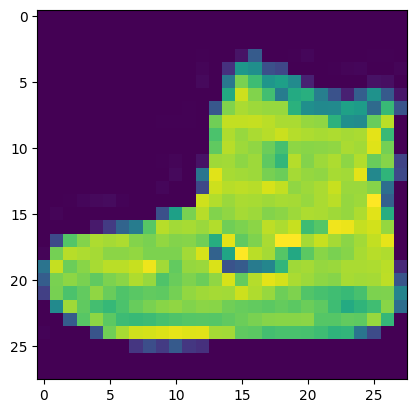

In [134]:
print(mnist_train[0][0].size())
plt.imshow(mnist_train[0][0].squeeze())

In [135]:
train_data_iter = Data.DataLoader(dataset=mnist_train, batch_size=64, shuffle=True)
for X, y in train_data_iter:
    print(f"{X.size()}\n{y.size()}")
    break


torch.Size([64, 1, 28, 28])
torch.Size([64])


In [136]:
# See how many categories here
minn = 10000
maxx = -1
for X, y in train_data_iter:
    a, batchMin = torch.min(y, 0)
    b, batchMax = torch.max(y, 0)
    minn = min(minn, a)
    maxx = max(maxx, b)
a, b


(tensor(0), tensor(9))

In [137]:
from torch import nn
net = nn.Sequential(
                                                          # 28
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), # 28
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=1),                # 26
    nn.Dropout(0.3),

    nn.Conv2d(32, 48, kernel_size=4, stride=2, padding=2),# 14
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=1),                # 12
    nn.Dropout(0.3),

    nn.Flatten(),
    nn.ReLU(),

    nn.Linear(12 * 12 * 48, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)

In [138]:
pic_test = torch.unsqueeze(mnist_train[0][0], dim=1)
print(pic_test.size())
for layer in net:
    pic_test = layer(pic_test)
    print(f'{layer.__class__.__name__}->{pic_test.size()}')

torch.Size([1, 1, 28, 28])
Conv2d->torch.Size([1, 32, 28, 28])
ReLU->torch.Size([1, 32, 28, 28])
MaxPool2d->torch.Size([1, 32, 26, 26])
Dropout->torch.Size([1, 32, 26, 26])
Conv2d->torch.Size([1, 48, 14, 14])
ReLU->torch.Size([1, 48, 14, 14])
MaxPool2d->torch.Size([1, 48, 12, 12])
Dropout->torch.Size([1, 48, 12, 12])
Flatten->torch.Size([1, 6912])
ReLU->torch.Size([1, 6912])
Linear->torch.Size([1, 128])
ReLU->torch.Size([1, 128])
Dropout->torch.Size([1, 128])
Linear->torch.Size([1, 10])
LogSoftmax->torch.Size([1, 10])


In [139]:
# This cell works well and print "torch.Size([64, 62])" as expected
for X, y in train_data_iter:
    y_hat = net(X)
    print(f'{X.size()} \n {y_hat.size()}')
    break

torch.Size([64, 1, 28, 28]) 
 torch.Size([64, 10])


In [140]:
loss = nn.CrossEntropyLoss()
num_epoch = 10
for epoch in range(1, num_epoch + 1):
    for X, y in train_data_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print(f'epoch: {epoch}, loss = {l}')

epoch: 1, loss = 0.43623191118240356
epoch: 2, loss = 0.3412894606590271
epoch: 3, loss = 0.6130672693252563
epoch: 4, loss = 0.5332384705543518
epoch: 5, loss = 0.3765077292919159
epoch: 6, loss = 0.32843321561813354
epoch: 7, loss = 0.3612191379070282
epoch: 8, loss = 0.5268602967262268
epoch: 9, loss = 0.3118099272251129
epoch: 10, loss = 0.36352285742759705


In [144]:
test_data_iter = Data.DataLoader(dataset=mnist_test, batch_size=32, shuffle=False)
for X, y in test_data_iter:
    y_hat = net(X)
    _, pre = torch.max(y_hat, dim = 1)
    print(f'{pre} \n {y}')
    break

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 4, 6, 0, 9, 4, 8, 8]) 
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8])


In [146]:
net.eval()
cor = 0
tot = 0
with torch.no_grad():
    for X, y in test_data_iter:
        y_hat = net(X)
        _, predicted = torch.max(y_hat, 1)
        tot += y.size(0)
        cor += (predicted == y).sum().item()
acc = cor / tot
print(f'Accuracy of the model on the test images: {acc * 100}%')

Accuracy of the model on the test images: 90.24%
